### State of (open-source) Deep Learning, in Python:
- 2 most popular frameworks:
    - Tensorflow (Google) ~2015
        - Keras (Google) ~2015
    - PyTorch (Facebook) ~2016

As of 2020, Keras library is now directly part of TensorFlow
- i.e. ``import tensorflow.keras``

## 1. Install Tensorflow:

1. Create new environment:
   -  `conda create -n dl pip python=3.8`
2. Switch to that environment:
   - `conda activate dl`
3. Installed Tensorflow within that environment:
   - `pip install tensorflow`
4. Install Jupyter Lab within that environment:
   - `pip install jupyter`
5. Launch Jupyter from within that environment.
   - `jupyter notebook`

In [1]:
# Import tensorflow.keras
import tensorflow.keras

In [2]:
# Check if you are in the right environment
!which jupyter

/Users/stefanroth/anaconda3/envs/dl/bin/jupyter


## 2. Other Options:

Other options:

1. install tensorflow via `conda install -c conda-forge tensorflow`


2. Use Docker - https://www.tensorflow.org/install/docker
    - e.g. `docker run -it -p 8888:8888 tensorflow/tensorflow:nightly-jupyter`
   
   
3. Use Cloud-Based Alternatives:
   - Google Colab: https://colab.research.google.com/
       - Run notebooks right in the cloud. 
       - Comes with GPU Support.
   - PaperSpace Gradient: https://gradient.paperspace.com/
   

---

### Making Neural Networks in Tensorflow / Keras

In [3]:
# Install some other libraries we will need
!pip install --no-input scikit-learn
!pip install --no-input matplotlib
!pip install --no-input pandas

  Using cached scikit_learn-0.24.1-cp38-cp38-macosx_10_13_x86_64.whl (7.2 MB)
  Using cached scipy-1.6.1-cp38-cp38-macosx_10_9_x86_64.whl (30.8 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached matplotlib-3.3.4-cp38-cp38-macosx_10_9_x86_64.whl (8.5 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached Pillow-8.1.2-cp38-cp38-macosx_10_10_x86_64.whl (2.2 MB)
  Using cached kiwisolver-1.3.1-cp38-cp38-macosx_10_9_x86_64.whl (61 kB)
  Using cached pandas-1.2.3-cp38-cp38-macosx_10_9_x86_64.whl (10.5 MB)
  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)


In [4]:
# Import the practice dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

In [5]:
!pip install seaborn

  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)


In [6]:
import seaborn as sns

<AxesSubplot:>

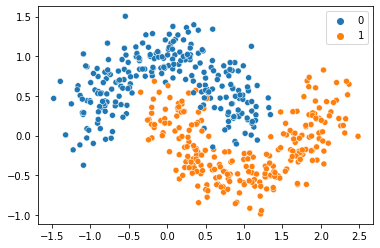

In [9]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [10]:
# Inspect the shape of X
X.shape

(500, 2)

In [11]:
# Inspect the shape of y
y.shape

(500,)

**Making a Feed-Forward Network**

In [12]:
from tensorflow.keras.models import Sequential # This class allows you to build Neural Networks using the Keras building blocks
from tensorflow.keras.layers import Dense # Dense layer is a fully connected layer

In [14]:
# Understand the input shape of each single entry in X
X[0].shape

(2,)

In [15]:
# Define the model - instantiate and object of the class Sequential
m = Sequential([
    Dense(units=2, input_shape=(2,), activation='sigmoid'),
    # units: # of neurons in the layer, 
    # input_shape: Shape of the input data
    # activation: Activation function of the neurons of the layer
    Dense(units=1, activation='sigmoid')
])

In [16]:
# Look at the summary of the model
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


**At this point, in sklearn, we would jump straight to m.fit()**
- But in Keras, there's one extra step:
    - compilation: compiling the python code you wrote into lower-level c++ code for better performance.

In [17]:
m.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# optimizer: Algorithm that is used to fit the weights
# loss: The loss function the model is trained with; In case of a binary classification, we will use binary_crossentropy
# metrics: A metric that is stored over the whole training of the model for later inspection

**Now we can train**: 🚃
- we can save our fitting history to our variable

In [18]:
history = m.fit(X, y, batch_size=32, epochs=100, validation_split=0.2)
# batch_size: 
# epochs: How often do we repeat the training on the whole training data; similar to max_iter in an sklearn model
# validation_split: Determines which fraction of the data is used as a validation set

Epoch 1/100
13/13 [==============================] - 1s 55ms/step - loss: 0.6060 - accuracy: 0.7469 - val_loss: 0.5965 - val_accuracy: 0.7900
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6077 - accuracy: 0.7371 - val_loss: 0.5942 - val_accuracy: 0.7800
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5915 - accuracy: 0.7667 - val_loss: 0.5922 - val_accuracy: 0.7600
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6005 - accuracy: 0.7621 - val_loss: 0.5902 - val_accuracy: 0.7500
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5882 - accuracy: 0.7885 - val_loss: 0.5883 - val_accuracy: 0.7600
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5843 - accuracy: 0.7774 - val_loss: 0.5863 - val_accuracy: 0.7400
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5810 - accuracy: 0.7806 - val_loss: 0.5844 - val_accuracy: 0.7400
Epoch 8/100


**And plot the results!**

In [19]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(12,6)

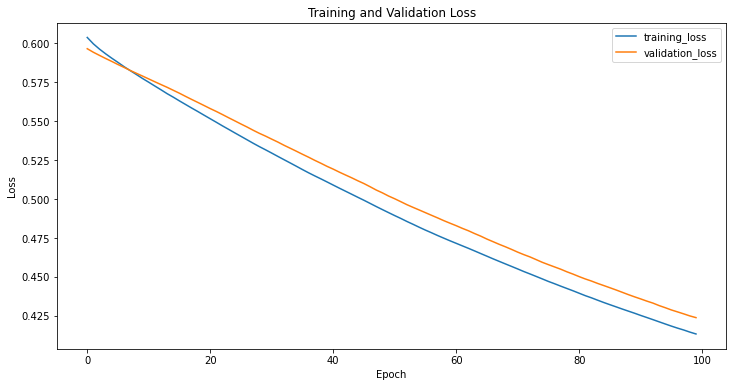

In [20]:
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

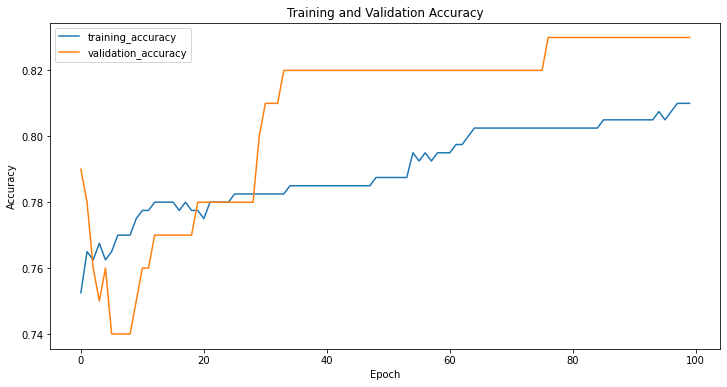

In [21]:
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# Evaluate the model
m.evaluate(X, y)

16/16 [==============================] - 0s 837us/step - loss: 0.4148 - accuracy: 0.8140


[0.41483375430107117, 0.8140000104904175]

In [23]:
# Make predictions
m.predict(X)

array([[0.72435087],
       [0.3931658 ],
       [0.7749614 ],
       [0.17680347],
       [0.20194674],
       [0.7930764 ],
       [0.75396335],
       [0.18360782],
       [0.3583251 ],
       [0.8048457 ],
       [0.681996  ],
       [0.20377722],
       [0.81645334],
       [0.26444036],
       [0.7955306 ],
       [0.79207575],
       [0.76487166],
       [0.52138215],
       [0.74355215],
       [0.8046886 ],
       [0.76808316],
       [0.77381027],
       [0.28236228],
       [0.74276686],
       [0.3495408 ],
       [0.6740727 ],
       [0.7370644 ],
       [0.1717889 ],
       [0.18488798],
       [0.6366521 ],
       [0.79683924],
       [0.59897727],
       [0.81015563],
       [0.16167122],
       [0.59735984],
       [0.70803034],
       [0.7666526 ],
       [0.37267303],
       [0.15525877],
       [0.3292514 ],
       [0.8070457 ],
       [0.1977765 ],
       [0.7144993 ],
       [0.1771628 ],
       [0.60885197],
       [0.35296   ],
       [0.6853035 ],
       [0.618

In [32]:
# Inspect the weights of the Neural Network
m.get_weights()

[array([[ 1.4266667, -1.3570246],
        [-0.8948085,  2.3078172]], dtype=float32),
 array([-0.25531313,  0.22083999], dtype=float32),
 array([[ 1.6508509],
        [-1.985213 ]], dtype=float32),
 array([0.00124137], dtype=float32)]

### Where to Begin Practicing: MNIST

In [79]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

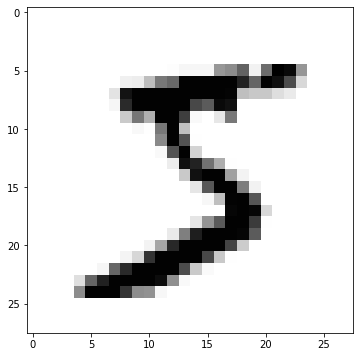

In [46]:
plt.imshow(X_train[0], cmap=plt.cm.Greys)

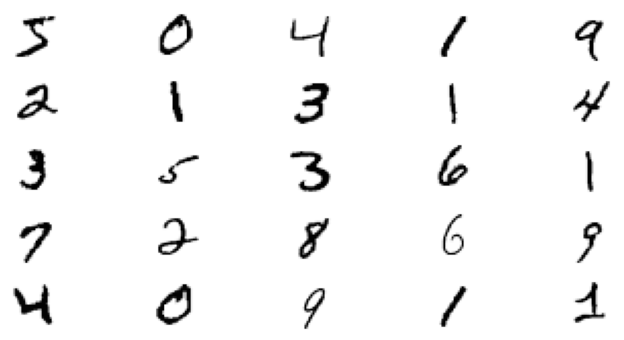

In [34]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [37]:
# Inspect the shape of X
X_train.shape # (60000, 28, 28)
# 60_000 handwritten digits
# each image has 28*28 pixels

(60000, 28, 28)

In [38]:
# Inspect the shape of y
y_train.shape

(60000,)

In [42]:
y_train[0]

5

In [48]:
# Look at the shape of a single image
X_train[0].shape

(28, 28)

In [59]:
X_train.reshape(60000, -1).shape

(60000, 784)

In [62]:
import numpy as np

In [63]:
vector = np.array([[1,2], [3,4]])

In [67]:
vector

array([[1, 2],
       [3, 4]])

In [68]:
vector.reshape(-1)

array([1, 2, 3, 4])

In [80]:
# We want the input image to be a flat array.
# Flatten the input
X_train = X_train.reshape(60000, -1)
X_train.shape

(60000, 784)

In [69]:
# Understand what it means to flatten the images
import pandas as pd
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Let's build a model

There will be two intricacies you have to take care of.

1. Defining the right input shape
2. Dealing with the shape of y

In [ ]:
# input_shape of first layer has to be (784,)

In [70]:
from tensorflow.keras.utils import to_categorical

In [81]:
# Before passing y_train into the model
y_train = to_categorical(y_train)

In [ ]:
# loss='categorical_crossentropy'

### Mini-Projects this Week:
- Neural Network From Scratch
- Classifying Handwritten Digits (MNIST)
    - Fashion MNIST: https://github.com/zalandoresearch/fashion-mnist
- Transfer Learning for Image Recognition
    - Up to you!